## Jupyter notebook of training and evaluation the model to predict the width of the fishes of the project FISHTRADER

In [ ]:
import pandas as pd
import matplotlib as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from numpy import log
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import acf
from datetime import datetime, timedelta

In [ ]:
#função para tratar campo data
def parser(x):
    return pd.datetime.strptime('190'+x, '%Y-%m')

#Agora vamos importar nosso arquivo 
df = pd.read_excel('biometria.xlsx', sheet_name='Página1')
print(df.head(10))

   Index   peso  comprimento_Total  comprimento_Padrao  comprimento_Cabeca  \
0    NaN  51.45               14.3                12.2                 4.0   
1    NaN  37.15               12.4                10.9                 3.8   
2    NaN  47.26               13.7                11.2                 3.4   
3    NaN  36.67               12.9                11.1                 3.7   
4    NaN  45.48               13.2                11.3                 3.8   
5    NaN  36.77               12.5                10.8                 3.2   
6    NaN  32.79               12.0                10.2                 3.4   
7    NaN  35.52               12.4                10.8                 3.4   
8    NaN  35.58               12.3                11.0                 3.4   
9    NaN  42.88               13.2                11.2                 3.8   

   altura  espessura       data  
0     4.1        1.9 2024-02-28  
1     3.2        1.2 2024-02-28  
2     4.0        1.7 2024-02-28  
3    

In [ ]:
df1 = df.drop(columns=[
'data', 
'Index', 
'peso'
])
df1.head()

,comprimento_Total,comprimento_Padrao,comprimento_Cabeca,altura,espessura
0,14.3,12.2,4.0,4.1,1.9
1,12.4,10.9,3.8,3.2,1.2
2,13.7,11.2,3.4,4.0,1.7
3,12.9,11.1,3.7,3.7,1.6
4,13.2,11.3,3.8,4.5,1.6


## Creating the unseen_Data of 10% of the real data to check model results

In [ ]:
data = df1.sample(frac=0.9, random_state=123)
data_unseen = df1.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (324, 5)
Unseen Data For Predictions: (36, 5)


In [ ]:
for col in data.select_dtypes(include='number').columns:
    print(col)

comprimento_Total
comprimento_Padrao
comprimento_Cabeca
altura
espessura


In [ ]:
# Run this cel to make sure all the variable are type float64!
#data.info()

In [ ]:
from pycaret.regression import *
exp1 = setup(data = data,  target = 'espessura', session_id=158, train_size=0.8, preprocess=False)


,Description,Value
0,Session id,158
1,Target,espessura
2,Target type,Regression
3,Original data shape,"(324, 5)"
4,Transformed data shape,"(324, 5)"
5,Transformed train set shape,"(259, 5)"
6,Transformed test set shape,"(65, 5)"
7,Numeric features,4


In [ ]:
best_model = compare_models(n_select=5 )  # default is R2, sort= 'R2' TO select the metric R2

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:48:02
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,0.0856,0.0144,0.1147,0.8494,0.0378,0.0423,0.0130
ridge,Ridge Regression,0.0861,0.0144,0.1150,0.8493,0.0379,0.0427,0.0090
br,Bayesian Ridge,0.0861,0.0144,0.1150,0.8493,0.0379,0.0428,0.0130
lr,Linear Regression,0.0863,0.0145,0.1152,0.8489,0.0380,0.0428,0.0070
lar,Least Angle Regression,0.0863,0.0145,0.1152,0.8489,0.0380,0.0428,0.0060
omp,Orthogonal Matching Pursuit,0.0907,0.0159,0.1206,0.8343,0.0398,0.0452,0.0110
lightgbm,Light Gradient Boosting Machine,0.0969,0.0187,0.1317,0.8077,0.0436,0.0483,0.0790
par,Passive Aggressive Regressor,0.0974,0.0189,0.1296,0.7974,0.0423,0.0479,0.0100
rf,Random Forest Regressor,0.0995,0.0200,0.1373,0.7899,0.0453,0.0496,0.0510
gbr,Gradient Boosting Regressor,0.0995,0.0204,0.1390,0.7857,0.0457,0.0496,0.0280


In [ ]:
best_model

[HuberRegressor(),
 Ridge(random_state=158),
 BayesianRidge(),
 LinearRegression(n_jobs=-1),
 Lars(random_state=158)]

## Create Model
#### This function trains and evaluates the performance of a given estimator using cross validation. The output of this function is a score grid with CV scores by fold. Metrics evaluated during CV can be accessed using the get_metrics function. Custom metrics can be added or removed using add_metric and remove_metric function. All the available models can be accessed using the models function.

In [ ]:
huber = exp1.create_model('huber')

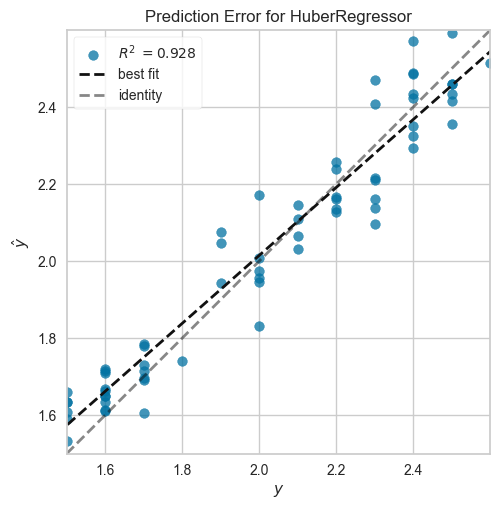

In [ ]:
#plot_model(et, plot = 'residuals')
plot_model(huber, plot = 'error')
#plot_model(et, plot = 'feature')



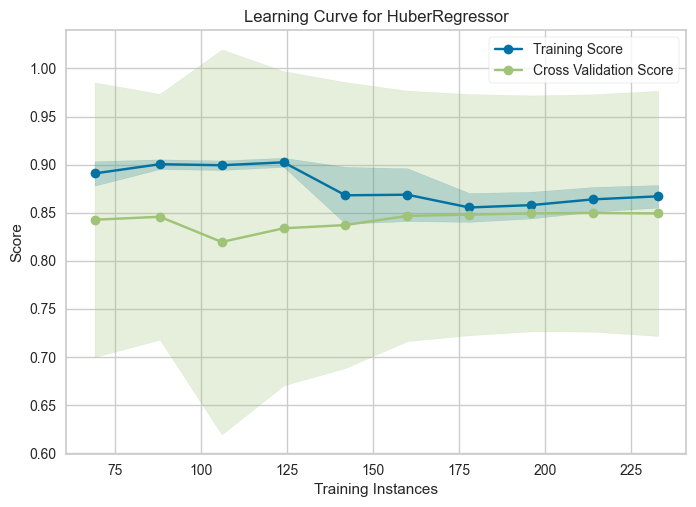

In [ ]:
plot_model(huber, plot = 'learning')

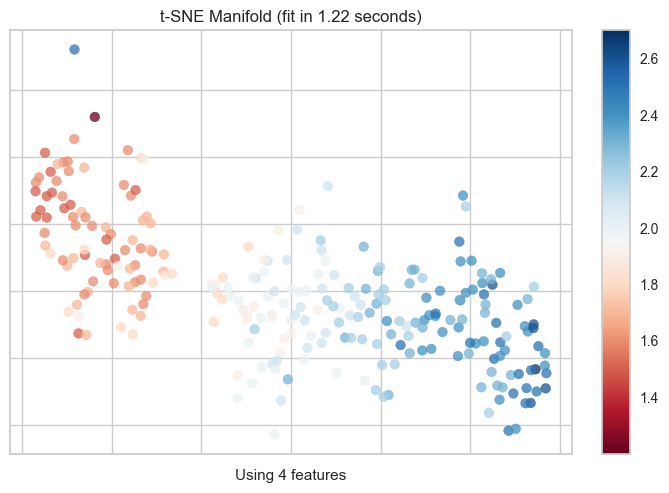

In [ ]:
exp1.plot_model(huber, plot = 'manifold')

## Blend an d sTacking if it is necessary!

In [ ]:
espessura_pred = exp1.predict_model(huber)
#holdout_pred.tail(5)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Huber Regressor,0.0787,0.0087,0.0934,0.9276,0.0312,0.0400


In [ ]:
unseen__espessura_pred = exp1.predict_model(huber, data=data_unseen)
unseen__espessura_pred .head(5)

,comprimento_Total,comprimento_Padrao,comprimento_Cabeca,altura,espessura,prediction_label
0,13.7,11.2,3.4,4.0,1.7,1.755156
1,12.7,10.8,3.3,3.7,1.6,1.639816
2,13.0,11.0,3.3,4.2,1.8,1.733306
3,11.8,9.9,3.2,3.5,1.5,1.544798
4,12.2,10.3,3.1,3.6,1.6,1.577376


## Tune model
#### This function tunes the hyperparameters of a given estimator. The output of this function is a score grid with CV scores by fold of the best selected model based on optimize parameter. Metrics evaluated during CV can be accessed using the get_metrics function. Custom metrics can be added or removed using add_metric and remove_metric function.

In [ ]:
tune_et= exp1.tune_model(et)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0767,0.0089,0.0942,0.9087,0.0312,0.0392
1,0.0625,0.0059,0.0765,0.9437,0.0255,0.0315
2,0.0769,0.0081,0.0898,0.9311,0.0308,0.0401
3,0.0833,0.0174,0.1319,0.8222,0.0492,0.0473
4,0.0722,0.0091,0.0955,0.8982,0.0292,0.0330
5,0.0955,0.0145,0.1206,0.8547,0.0407,0.0496
6,0.0844,0.0108,0.1038,0.9072,0.0338,0.0409
7,0.0737,0.0086,0.0926,0.9324,0.0330,0.0401
8,0.0833,0.0119,0.1091,0.8277,0.0368,0.0414


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
#plot_model(rf, plot = 'tree')

In [ ]:
#pred_unseen = predict_model(rf, data = unseen_dataframe)


In [ ]:
# dashboard of pycaret
#evaluate_model(rf)